In [6]:
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#naturel langage tool kit 
import nltk
#nltk stopwords
nltk.download('stopwords')
#nltk phrase
nltk.download('punkt')
#utilisé pour la lemmatisation, où les formes fléchies 
#des mots sont ramenées à leur forme de base 
nltk.download('wordnet')
!pip install wordcloud



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
Doc1 = "La collecte de ces données a plusieurs objectifs. Elle permet de constituer en temps réel une cohorte de patients infectés, qui inclut aujourd’hui plus de 500 000 patients et qui est devenue une base de données de référence dans le monde"

Doc2 = "Cette base de données alimente près de 60 travaux de recherche des Hôpitaux de Paris portant sur les caractéristiques cliniques de la maladie, sur l’impact de certains médicaments ou encore sur l’étude des facteurs aggravants"

Doc3 = "En y injectant de l’intelligence artificielle, l’AP-HP et ses partenaires mènent également des études de prédiction et testent virtuellement des solutions capables de stopper le virus. Par exemple, ils développent des algorithmes d’apprentissage profond (deep learning) utilisant les données de radiographie et de scanner pour créer des outils fiables de prédiction de formes sévères de Covid-19"

Doc4 = "L’exploitation de ces données permet également d’établir des statistiques et des visualisations, et de fournir des informations réutilisables. Elles sont mises à disposition des équipes d’encadrement des unités de soin sur un portail dédié pour les aider à mieux comprendre le virus, ses évolutions et sa diffusion"

In [8]:
def clean_text(text):
    text = re.sub("\d+|\.|,|Md$|%|:$|\)|\(|\n",'',Doc1).lower()
    return text

In [9]:
 stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [10]:
clean_text(Doc1)

'la collecte de ces données a plusieurs objectifs elle permet de constituer en temps réel une cohorte de patients infectés qui inclut aujourd’hui plus de   patients et qui est devenue une base de données de référence dans le monde'

In [11]:
#recuperer les stopwords
StopWord = set(stopwords.words('french'))

#wordtokenize (tokenisation) est utilisée pour diviser le text 
#clean_text pour supprimer tt les caractere dont on a pas besoins 
#du text (défini la fonction en haut) 

DocList = word_tokenize(clean_text(Doc1).lower())
DocFil = [w for w in DocList if not w in StopWord]
print (DocFil)


['collecte', 'données', 'a', 'plusieurs', 'objectifs', 'permet', 'constituer', 'temps', 'réel', 'cohorte', 'patients', 'infectés', 'inclut', 'aujourd', '’', 'hui', 'plus', 'patients', 'devenue', 'base', 'données', 'référence', 'monde']


In [12]:
#module pour lemmatiser 
from nltk.stem import WordNetLemmatizer
#lemmatisation  
#stem pour le nettoyages
lemmatizer = WordNetLemmatizer()
DocStem = [lemmatizer.lemmatize(w) for w in DocFil]
DocStem

['collecte',
 'données',
 'a',
 'plusieurs',
 'objectifs',
 'permet',
 'constituer',
 'temp',
 'réel',
 'cohorte',
 'patient',
 'infectés',
 'inclut',
 'aujourd',
 '’',
 'hui',
 'plus',
 'patient',
 'devenue',
 'base',
 'données',
 'référence',
 'monde']

In [13]:
#les modules/libraires de la représentation graphiques 
import collections, itertools, seaborn
import matplotlib.pyplot as plt 

In [14]:
# le compteur compte les nombre d'occurences de chaque élément dans une lisTe (méthode de la librairie -collection-)
CountWord = collections.Counter(DocStem)
#CountWord
#creer un tableau de deux colonnes (mots et occurences)
DfCountWord = pd.DataFrame(CountWord.most_common(15),columns = ["Mots","Occurences"])
#DfCountWord

<Axes: ylabel='Mots'>

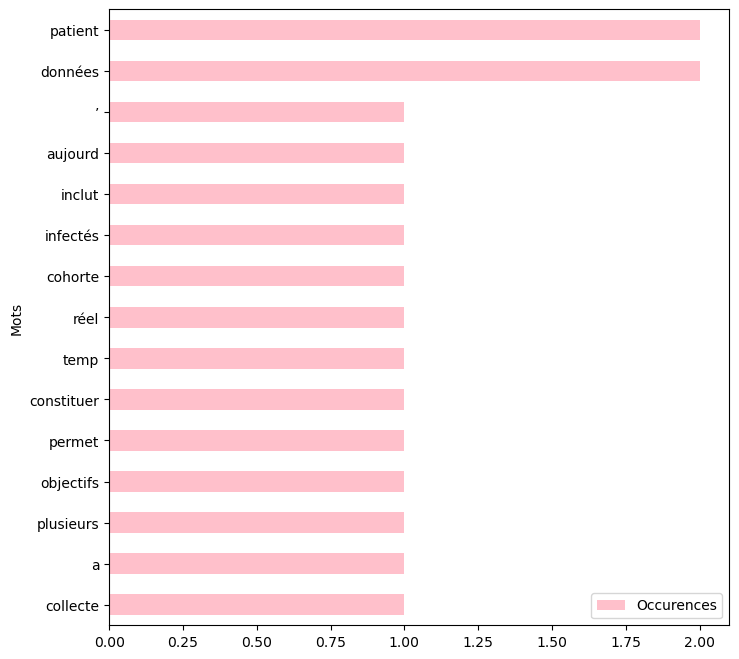

In [15]:
# avec le barplot on cree le graphe
#en utilisant pandas
fig, ax = plt.subplots(figsize=(8, 8))
DfCountWord.sort_values(by='Occurences').plot.barh(x='Mots',
                                                   y='Occurences',
                                                   ax=ax,
                                                   color="pink")


In [20]:
#
from wordcloud import WordCloud, STOPWORDS

In [23]:
Doc = open(r'C:\Users\ASUS\Desktop\DU DATA SCIENCE\TP\Textmining\DiscoursMacron.txt', 'r', encoding='utf-8')
Disc0 = Doc.readline()
Disc1 = [re.sub(',|\.', ' ', w) for w in Disc0]
Disc1 = [re.sub('\W|\d+', ' ', w) for w in Disc0]

Disc = " ".join(Disc1)


In [24]:
WC = WordCloud(width=800, height=800, background_color="white", 
               stopwords=StopWord, min_font_size=12)
WC.generate(Disc.lower())
#dhsdhfsfdh